In [1]:
# Create Latitude and Longitude Combinations
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs # When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [4]:
# Add the latitudes and longitudes to a list. Here we unzip thw zip from above!
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #броим позицията на записа! всеки сет започва от 1, затова при нов сет залагама 1 като начало тук;
        
    # Create endpoint URL with each city.
    # city_url = url + "&q=" + cities[i] --> wanting to check if this really gives an error!!! <---
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") #когато градът се състои от 2 думи (има празно място м/у думите), кодът ще върне само първата дума. Затова е нужно replace ...

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass #continue can be used as well!

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | maneadero
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | amahai
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | talas
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | yashan
Processing Record 15 of Set 1 | babanusah
City not found. Skipping...
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | grudziadz
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | norsup
Processing Record 21 of Set 1 | zhireken
Processing Record 22 of Set 1 | atuona
Processing Recor

Processing Record 39 of Set 4 | kamenka
Processing Record 40 of Set 4 | kankon
Processing Record 41 of Set 4 | bereda
Processing Record 42 of Set 4 | omsukchan
Processing Record 43 of Set 4 | wencheng
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | palmira
Processing Record 47 of Set 4 | zonguldak
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | polewali
Processing Record 50 of Set 4 | almaznyy
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | sabla
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | fort nelson
Processing Record 9 of Set 5 | pangnirtung
Processing Record 10 of Set 5 | debre birhan
Processing Record 11 of Set 5 | sonoita
Processing Record 12 of Set 5 | k

Processing Record 27 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | republic
Processing Record 30 of Set 8 | kenai
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | port macquarie
Processing Record 33 of Set 8 | celestun
Processing Record 34 of Set 8 | moyale
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | niamey
Processing Record 38 of Set 8 | otane
Processing Record 39 of Set 8 | santa rosa
Processing Record 40 of Set 8 | nurota
Processing Record 41 of Set 8 | bojnurd
Processing Record 42 of Set 8 | darapidap
Processing Record 43 of Set 8 | aasiaat
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | bikin
Processing Record 46 of Set 8 | abu samrah
Processing Record 47 of Set 8 | qingyuan
Processing Record 48 of Set 8 | acarau
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 50 of Set 8 | semey
Proc

Processing Record 15 of Set 12 | sembakung
Processing Record 16 of Set 12 | nyurba
Processing Record 17 of Set 12 | flin flon
Processing Record 18 of Set 12 | half moon bay
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | muisne
Processing Record 21 of Set 12 | khuzhir
Processing Record 22 of Set 12 | venice
Processing Record 23 of Set 12 | pogradec
Processing Record 24 of Set 12 | novobirilyussy
Processing Record 25 of Set 12 | manado
Processing Record 26 of Set 12 | kosonsoy
Processing Record 27 of Set 12 | mazagao
Processing Record 28 of Set 12 | yar-sale
Processing Record 29 of Set 12 | ndele
Processing Record 30 of Set 12 | thinadhoo
Processing Record 31 of Set 12 | carahue
Processing Record 32 of Set 12 | rongcheng
Processing Record 33 of Set 12 | tupik
Processing Record 34 of Set 12 | catumbela
Processing Record 35 of Set 12 | papara
Processing Record 36 of Set 12 | esik
Processing Record 37 of Set 12 | luba
Processing Record 38 of Set 12 | skierniewice


In [9]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dbde025c0b5b0982c92fb94927420c1c&q=ramhormoz'

In [10]:
len(city_data)

575

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,41.23,87,90,5.75,CA,2021-08-01 01:48:29
1,Maneadero,31.7167,-116.5667,72.10,78,16,1.01,MX,2021-08-01 01:48:21
2,Hobart,-42.8794,147.3294,52.05,64,40,5.01,AU,2021-08-01 01:49:39
3,Hamilton,39.1834,-84.5333,70.65,75,90,6.91,US,2021-08-01 01:47:09
4,Puerto Ayora,-0.7393,-90.3518,71.55,91,7,4.00,EC,2021-08-01 01:49:31
5,Mataura,-46.1927,168.8643,49.48,98,100,1.03,NZ,2021-08-01 01:49:59
6,Avarua,-21.2078,-159.7750,77.05,73,75,12.66,CK,2021-08-01 01:49:37
7,Amahai,-3.3333,128.9167,82.22,75,47,2.84,ID,2021-08-01 01:52:16
8,Talnakh,69.4865,88.3972,59.47,64,84,13.94,RU,2021-08-01 01:51:18
9,Talas,38.6908,35.5538,50.67,82,0,5.75,TR,2021-08-01 01:52:23


In [12]:
new_column_names = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_names]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-08-01 01:48:29,70.4692,-68.5914,41.23,87,90,5.75
1,Maneadero,MX,2021-08-01 01:48:21,31.7167,-116.5667,72.10,78,16,1.01
2,Hobart,AU,2021-08-01 01:49:39,-42.8794,147.3294,52.05,64,40,5.01
3,Hamilton,US,2021-08-01 01:47:09,39.1834,-84.5333,70.65,75,90,6.91
4,Puerto Ayora,EC,2021-08-01 01:49:31,-0.7393,-90.3518,71.55,91,7,4.00
...,...,...,...,...,...,...,...,...,...
570,Marathon,US,2021-08-01 01:55:50,44.9000,-89.7668,65.80,91,40,4.61
571,Duyun,CN,2021-08-01 01:55:50,26.2667,107.5167,83.44,67,52,2.98
572,Coahuayana,MX,2021-08-01 01:55:51,18.7333,-103.6833,80.02,85,76,1.10
573,Middlesbrough,GB,2021-08-01 01:55:51,54.5762,-1.2348,55.40,83,100,6.98


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x") #ако х се пропусне, връща непрочитуем формат
today

'07/31/21'

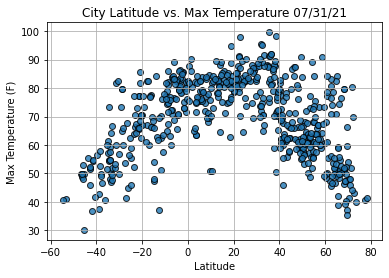

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

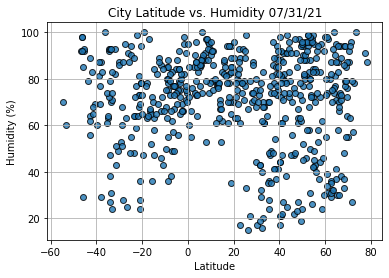

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

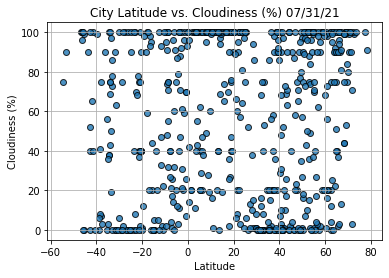

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

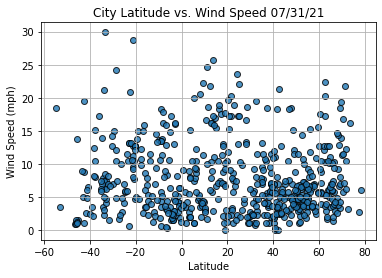

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    #If we run this code there will be no output until we call the function with five parameters.
    #To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.

In [22]:
#Create the Hemisphere DataFrames
#We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
#To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.

index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-08-01 01:48:27
Lat                        -33.65
Lng                      115.3333
Max Temp                    50.04
Humidity                       70
Cloudiness                     97
Wind Speed                  29.91
Name: 13, dtype: object

In [23]:
# We can also filter a DataFrame based on a value of a row.
#  For instance, if we wanted to get all Northern Hemisphere latitudes, 
# for latitudes greater than or equal to 0, we can filter the city_data_df

city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
570     True
571     True
572     True
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [25]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df 
# Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-08-01 01:48:29,70.4692,-68.5914,41.23,87,90,5.75
1,Maneadero,MX,2021-08-01 01:48:21,31.7167,-116.5667,72.10,78,16,1.01
3,Hamilton,US,2021-08-01 01:47:09,39.1834,-84.5333,70.65,75,90,6.91
8,Talnakh,RU,2021-08-01 01:51:18,69.4865,88.3972,59.47,64,84,13.94
9,Talas,TR,2021-08-01 01:52:23,38.6908,35.5538,50.67,82,0,5.75


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

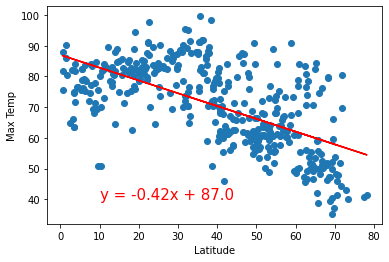

In [27]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
# northern_hemi_df DataFrame.

# Call the plot_linear_regression function (row 21) with the x and y values, and edit the title, y_label, 
# and text_coordinates for the maximum temperature scatter plot. 
# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

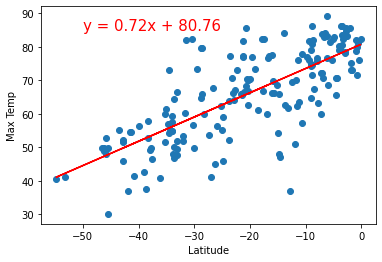

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

In [ ]:
## FINDING

# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 
# This means that as we approach the equator, 0° latitude, the temperatures become warmer.

# Find the Correlation Between Latitude and Percent Humidity

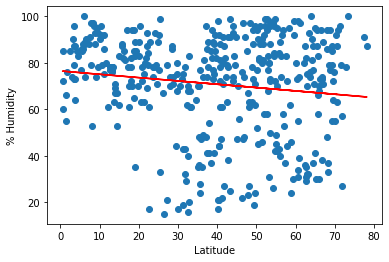

In [30]:
# Linear regression on the Northern Hemisphere 
# --> CALLING THE FUNCTION ON LINE 21 AGAIN!
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

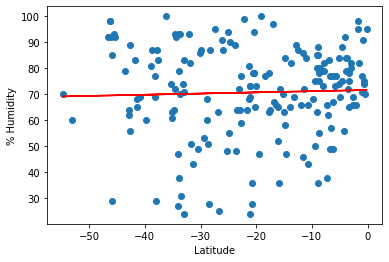

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# FINDING
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the 
# Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to 
# changing weather patterns that can increase or decrease percent humidity.

In [37]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.03536945576034718


# Find the Correlation Between Latitude and Percent Cloudiness

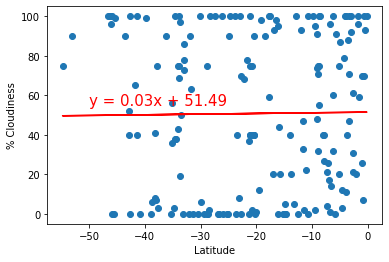

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,55))

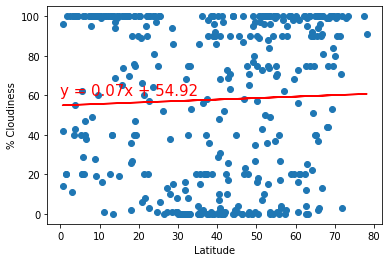

In [41]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))

In [ ]:
# FINDING
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than 
# –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent 
# cloudiness. 

In [42]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.037439996424544195


# Find the Correlation Between Latitude and Wind Speed

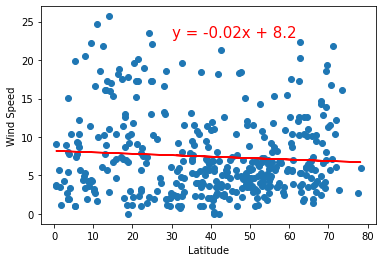

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,23))

In [54]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(r_value)

-0.07158831683923406


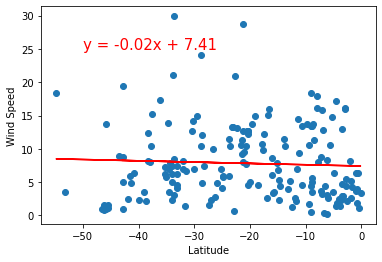

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [ ]:
# FINDING:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for 
# the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind 
# speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 

In [53]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(r_value)

-0.04883615437198106
